In [1]:
# 1. Import all the libraries we need
from sklearn import datasets                     # To load the iris dataset
from sklearn.cluster import KMeans                 # <-- This is our new (unsupervised) model
from sklearn.metrics import silhouette_score       # <-- This is our new (unsupervised) metric
import matplotlib.pyplot as plt                # For plotting
import pandas as pd                            # Good for handling data (though not strictly needed)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# 2. Load and Prepare the dataset
# As this is UNSUPERVISED, we do not need a train/test split.
# We are trying to find patterns in the *entire* dataset.
iris = datasets.load_iris()
X = iris.data  # Predictors
y = iris.target  # We load the 'y' (answers) ONLY to compare our final plot.
                 # We will NOT use 'y' for training.

print(f"Dataset loaded. We have {X.shape[0]} samples and {X.shape[1]} features.")

# The assignment asks us to use the number of classes we identified.
# In our first notebook, we saw there were 3 classes.
# So, we must use K=3.
k = 3
print(f"We will be looking for {k} clusters.")


print("\n--- 1. K-Means Clustering Model ---")

Dataset loaded. We have 150 samples and 4 features.
We will be looking for 3 clusters.

--- 1. K-Means Clustering Model ---


In [3]:
# 3. Create and Train the Model
# We must set n_clusters=k
# We set random_state=42 so our results are the same every time we run it.
# 'n_init=10' is standard and stops a future warning.
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)

# Now, 'fit' the model. Notice we ONLY pass 'X'.
# We are not passing 'y' because this is unsupervised.
kmeans_model.fit(X)

print("K-Means model fitted successfully.")

K-Means model fitted successfully.


C:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
# 4. Get the Results from the Model
# Get the cluster that each data point was assigned to (e.g., 0, 1, or 2)
cluster_labels = kmeans_model.labels_

# Get the coordinates of the final cluster centers
centroids = kmeans_model.cluster_centers_

print(f"First 10 cluster labels: {cluster_labels[:10]}") #simple check for cluster


print("\n--- 2. Performance Report (Silhouette Score) ---")

First 10 cluster labels: [1 1 1 1 1 1 1 1 1 1]

--- 2. Performance Report (Silhouette Score) ---


In [5]:
# 5. Evaluate the Model's Performance
# The assignment asks for the silhouette score.
# This score measures how good the clusters are (higher is better).
# It needs the data (X) and the cluster labels our model found.
s_score = silhouette_score(X, cluster_labels)

print(f"The Silhouette Score for k={k} is: {s_score:.4f}")
# A score around 0.55 is decent for this dataset.


print("\n--- 3. Visualization ---")

The Silhouette Score for k=3 is: 0.5528

--- 3. Visualization ---


Generating cluster plots...


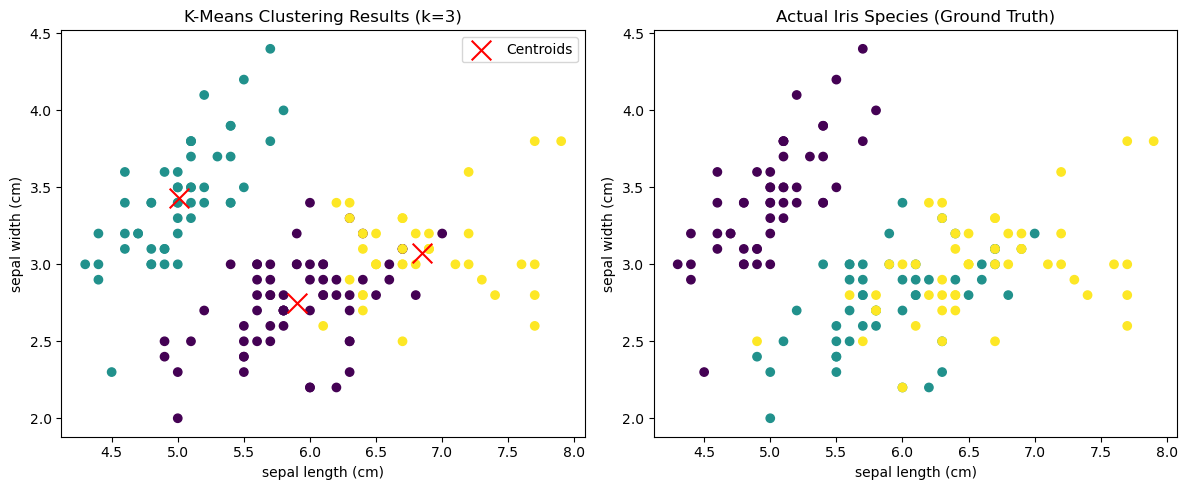


K-Means Clustering analysis complete.


In [6]:
# 6. Visualize the Clusters
# The assignment asks for a visualization.
# A scatter plot is best for clustering.
# We have 4 features, but we can only plot 2D.
# Let's plot the first two features: Sepal Length vs. Sepal Width

# We will make two plots side-by-side:
# 1. The clusters our K-Means model *found*.
# 2. The *actual* species (the 'ground truth') to see how we did.

plt.figure(figsize=(12, 5)) # Create a figure or canva block 12 inch wide and 5 tall

# --- Plot 1: K-Means Found Clusters ---
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st plot)
# Scatter plot of Feature 0 vs Feature 1.
# c=cluster_labels means "color the dots based on the cluster label"
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
# Plot the centroids on top as big red 'X's
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering Results (k={k})')
plt.xlabel(iris.feature_names[0]) # Sepal Length
plt.ylabel(iris.feature_names[1]) # Sepal Width
plt.legend()

# --- Plot 2: Ground Truth (Actual Species) ---
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd plot)
# This plot is the same, but we color based on the *real* 'y' labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Actual Iris Species (Ground Truth)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

print("Generating cluster plots...")
plt.tight_layout() # Fixes any overlapping text
plt.show()

print("\nK-Means Clustering analysis complete.")